In [1]:
import sys, os
import sparse
import xsimlab as xs
import numpy as np
import pandas as pd
import igraph as ig

In [2]:
sys.path.insert(0, os.path.join(os.getcwd(), '..'))
import vmlab
from vmlab.models.fruit import fruit as model

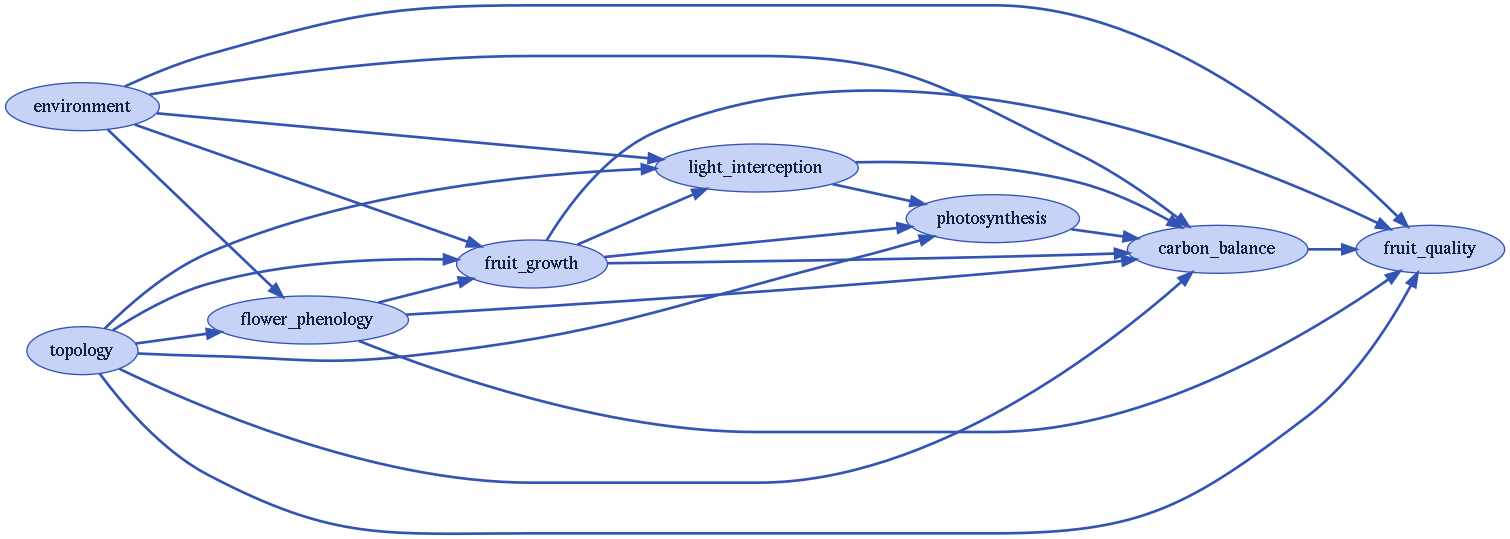

In [3]:
model.visualize(show_inputs=False, show_variables=False)

In [4]:
nb_leaves = [5, 10, 25, 50, 100, 150, 300, 500] # original fruit model publication, here a gu is a branch already
nb_gus = len(nb_leaves)
g = ig.Graph.Tree(nb_gus, 2, mode=ig.TREE_OUT)
adjacency = np.array(g.get_adjacency().data)

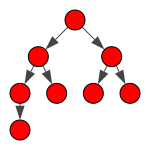

In [5]:
ig.plot(g, bbox=(0,0,150,150), layout=g.layout_reingold_tilford())

In [6]:
ds = vmlab.create_setup(
    model=model,
    setup_toml='../share/setup/fruit_model.toml',
    clocks={
        'day': pd.date_range(start='2002-12-01', end='2003-03-31', freq="1d"),
        'week': pd.date_range(start='2002-12-01', end='2003-03-31', freq="1W")
    },
    main_clock='day',
    input_vars={
        'topology': {
            'adjacency': adjacency,
            'nb_leaves': nb_leaves
        },
        'fruit_growth': {
            'nb_fruits_ini': np.ones(nb_gus)
        },
        'flower_phenology': {
            'bloom_date': np.full(nb_gus, '2002-11-30')
        },
        'carbon_balance': {
            'DM_fruit': np.zeros(nb_gus)
        },
    },
    output_vars='day'
)

TypeError: create_setup() got an unexpected keyword argument 'main_clock'

In [ ]:
ds

In [ ]:
ds_out = ds.xsimlab.run(model=model, decoding={ 'mask_and_scale': False }, hooks=[xs.monitoring.ProgressBar()])

In [ ]:
ds_out

In [ ]:
_ = ds_out.carbon_balance__DM_fruit.to_dataframe().unstack(level='GU').plot(subplots=True, layout=(nb_gus//3+1,3), figsize=(20,7), sharex=False, sharey=True)

In [ ]:
_ = ds_out.fruit_quality__FM_fruit.to_dataframe().unstack(level='GU').plot(subplots=True, layout=(nb_gus//3+1,3), figsize=(20,7), sharex=False, sharey=True)

In [ ]:
_ = ds_out.photosynthesis__photo.to_dataframe().unstack(level='GU').plot(subplots=True, layout=(nb_gus//3+1,3), figsize=(20,7), sharex=False, sharey=True)

In [ ]:
_ = ds_out.photosynthesis__Pmax.to_dataframe().unstack(level='GU').plot(subplots=True, layout=(nb_gus//3+1,3), figsize=(20,7), sharex=False, sharey=True)

In [ ]:
_ = ds_out.fruit_growth__D_fruit.to_dataframe().unstack(level='GU').plot(subplots=True, layout=(nb_gus//3+1,3), figsize=(20,7), sharex=False, sharey=True)

In [ ]:
_ = ds_out.light_interception__LA.to_dataframe().unstack(level='GU').plot(subplots=True, layout=(nb_gus//3+1,3), figsize=(20,7), sharex=False, sharey=True)

In [ ]:
_ = ds_out.carbon_balance__reserve_leaf.to_dataframe().unstack(level='GU').plot(subplots=True, layout=(nb_gus//3+1,3), figsize=(20,7), sharex=False, sharey=True)

In [ ]:
_ = ds_out.carbon_balance__reserve_stem.to_dataframe().unstack(level='GU').plot(subplots=True, layout=(nb_gus//3+1,3), figsize=(20,7), sharex=False, sharey=True)

In [ ]:
_ = ds_out.carbon_balance__reserve_nmob_stem.to_dataframe().unstack(level='GU').plot(subplots=True, layout=(nb_gus//3+1,3), figsize=(20,7), sharex=False, sharey=True)

In [ ]:
_ = (ds_out.photosynthesis__photo - ds_out.carbon_balance__MR_veget) \
    .to_dataframe('cb').unstack(level='GU').plot(subplots=True, layout=(nb_gus//3+1,3), figsize=(20,7), sharex=False, sharey=True)

In [ ]:
_ = ds_out.carbon_balance__assimilates.to_dataframe().unstack(level='GU').plot(subplots=True, layout=(nb_gus//3+1,3), figsize=(20,7), sharex=False, sharey=True)

In [ ]:
_ = ds_out.carbon_balance__reserve_mob.to_dataframe().unstack(level='GU').plot(subplots=True, layout=(nb_gus//3+1,3), figsize=(20,7), sharex=False, sharey=True)

In [ ]:
_ = ds_out.carbon_balance__MR_stem.to_dataframe().unstack(level='GU').plot(subplots=True, layout=(nb_gus//3+1,3), figsize=(20,7), sharex=False, sharey=True)

In [ ]:
_ = ds_out.carbon_balance__reserve_nmob_leaf.to_dataframe().unstack(level='GU').plot(subplots=True, layout=(nb_gus//3+1,3), figsize=(20,7), sharex=False, sharey=True)

In [ ]:
_ = ds_out.carbon_balance__remains_1.to_dataframe().unstack(level='GU').plot(subplots=True, layout=(nb_gus//3+1,3), figsize=(20,7), sharex=False, sharey=True)

In [ ]:
_ = ds_out.carbon_balance__remains_2.to_dataframe().unstack(level='GU').plot(subplots=True, layout=(nb_gus//3+1,3), figsize=(20,7), sharex=False, sharey=True)

In [ ]:
_ = ds_out.carbon_balance__reserve_nmob_leaf.to_dataframe().unstack(level='GU').plot(subplots=True, layout=(nb_gus//3+1,3), figsize=(20,7), sharex=False, sharey=True)

In [ ]:
_ = ds_out.carbon_balance__reserve_nmob_stem.to_dataframe().unstack(level='GU').plot(subplots=True, layout=(nb_gus//3+1,3), figsize=(20,7), sharex=False, sharey=True)

In [ ]:
_ = ds_out.carbon_balance__MR_stem.to_dataframe().unstack(level='GU').plot(subplots=True, layout=(nb_gus//3+1,3), figsize=(20,7), sharex=False, sharey=True)

In [ ]:
_ = ds_out.carbon_balance__MR_veget.to_dataframe().unstack(level='GU').plot(subplots=True, layout=(nb_gus//3+1,3), figsize=(20,7), sharex=False, sharey=True)

In [ ]:
_ = ds_out.carbon_balance__remains_3.to_dataframe().unstack(level='GU').plot(subplots=True, layout=(nb_gus//3+1,3), figsize=(20,7), sharex=False, sharey=True)